## Imports

In [706]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import plotly.express as px
#!pip install shap 
import shap

#!pip install imblearn 
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [707]:
df = pd.read_excel('Telco_customer_churn.xlsx')

In [708]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [709]:
df.columns = df.columns.str.replace(' ', '_')

In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip_Code           7043 non-null   int64  
 6   Lat_Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior_Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure_Months      7043 non-null   int64  
 14  Phone_Service      7043 non-null   object 
 15  Multiple_Lines     7043 non-null   object 
 16  Internet_Service   7043 

## Exploring Data

In [711]:
# Commented this out because for some reason it's affecting the models below...

# Total Charges needs to be numeric
df['Total_Charges'] = pd.to_numeric(df.Total_Charges, errors='coerce')
# we can see total charges has 11 missing values 
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip_Code                0
Lat_Long                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges          11
Churn_Label             0
Churn_Value             0
Churn_Score             0
CLTV                    0
Churn_Reason         5174
dtype: int64

In [712]:
df[np.isnan(df['Total_Charges'])] 

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [713]:
# Filling null total charges with mean of column
mean_value = df['Total_Charges'].mean() 
df['Total_Charges'].fillna(value=mean_value, inplace=True)

# df.fillna(df["Total_Charges"].mean())

## Visualizations

In [714]:
df.corr().style.background_gradient(cmap='coolwarm', axis=None)

,Count,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Churn_Value,Churn_Score,CLTV
Count,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Zip_Code,nan,1.000000,0.895743,-0.784271,0.001041,-0.004596,-0.001461,0.003346,-0.002769,-0.003562
Latitude,nan,0.895743,1.000000,-0.876779,-0.001631,-0.019899,-0.010307,-0.003384,-0.007684,0.000886
Longitude,nan,-0.784271,-0.876779,1.000000,-0.001678,0.024098,0.009039,0.004594,0.004260,0.000485
Tenure_Months,nan,0.001041,-0.001631,-0.001678,1.000000,0.247900,0.824757,-0.352229,-0.224987,0.396406
Monthly_Charges,nan,-0.004596,-0.019899,0.024098,0.247900,1.000000,0.650468,0.193356,0.133754,0.098693
Total_Charges,nan,-0.001461,-0.010307,0.009039,0.824757,0.650468,1.000000,-0.199428,-0.124251,0.341384
Churn_Value,nan,0.003346,-0.003384,0.004594,-0.352229,0.193356,-0.199428,1.000000,0.664897,-0.127463
Churn_Score,nan,-0.002769,-0.007684,0.004260,-0.224987,0.133754,-0.124251,0.664897,1.000000,-0.079782
CLTV,nan,-0.003562,0.000886,0.000485,0.396406,0.098693,0.341384,-0.127463,-0.079782,1.000000


## Demographic Information
The following code creates a stacked percentage bar chart for each demographic attribute (gender, SeniorCitizen, Partner, Dependents), showing the percentage of Churn for each category of the attribute.

In [715]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.

            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization

            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(22, 7 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Churn_Value']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

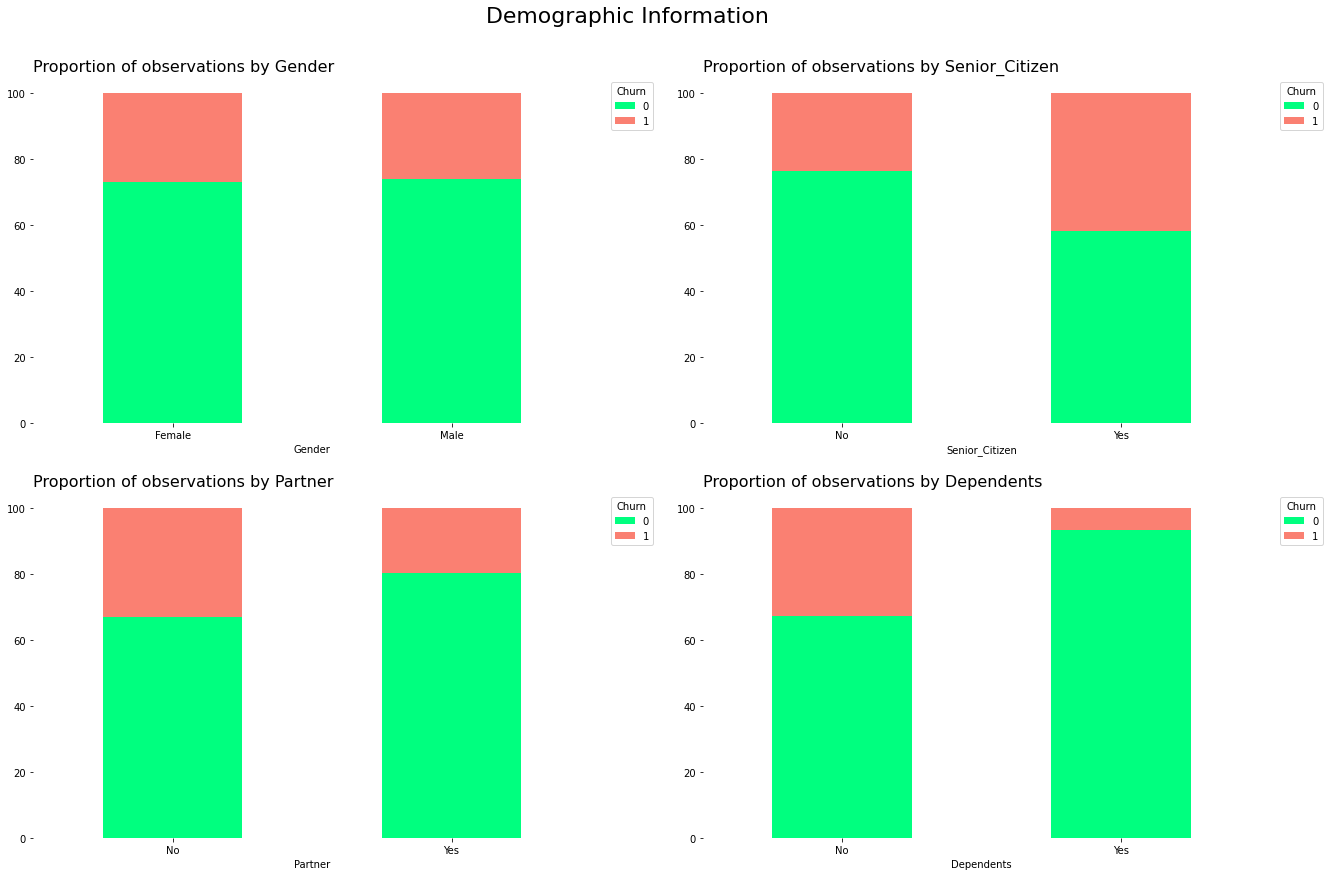

In [716]:
# demographic column names
demographic_columns = ['Gender', 'Senior_Citizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

As shown above, each bar is a category of the independent variable, and it is subdivided to show the proportion of each response class (No and Yes).

We can extract the following conclusions by analyzing demographic attributes:



*   The churn rate of senior citizens is almost double that of young citizens.
*   We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.
*   Customers with a partner churn less than customers with no partner.






## Customer Account Information — Categorical variables

As we did with demographic attributes, we evaluate the percentage of Churn for each category of the customer account attributes 

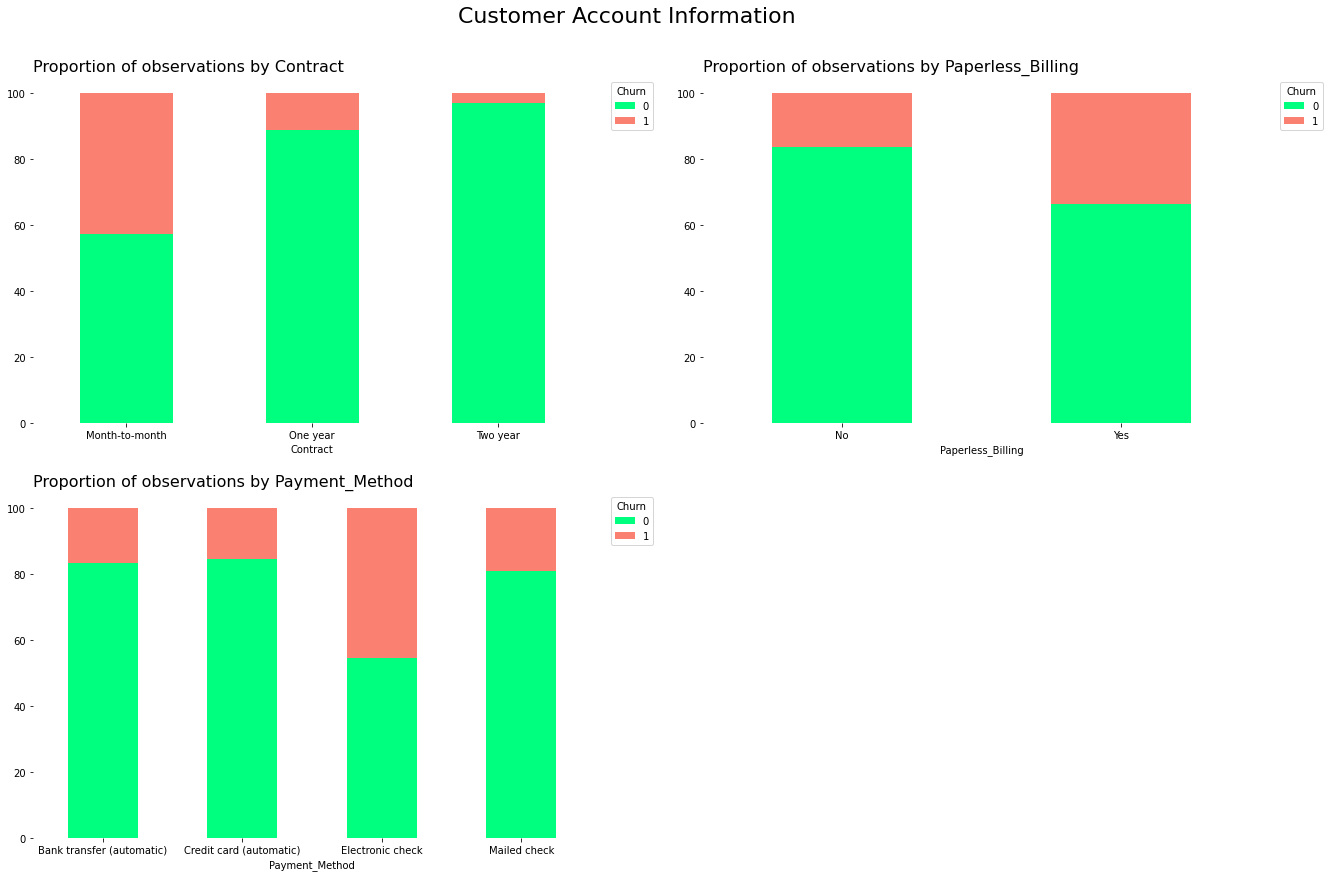

In [717]:
# customer account column names
account_columns = ['Contract', 'Paperless_Billing', 'Payment_Method']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

We can extract the following conclusions by analyzing customer account attributes:


*   Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.

*   Customers who opted for an electronic check as paying method are more likely to leave the company.

*   Customers subscribed to paperless billing churn more than those who are not subscribed.

Couldn't get the below Multivariate Analysis to work. Not sure what it's for/what we want to do for it. We can keep if someone wants to adjust it. I attemtped to change all the values to what we're using (i.e. Churn_Value as our y identifier, but it didn't like that so not entirely sure...

## Feature Engineering
Data coded as df_rev from here on out.

In [718]:
#getting rid of columns we won't need 
df_rev = df.drop(['CustomerID','Country','State','City', 'Lat_Long', 'Latitude', 'Longitude','Churn_Label','Churn_Score','CLTV'], axis=1)

In [719]:
df_rev.info() # See what type of data in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Zip_Code           7043 non-null   int64  
 2   Gender             7043 non-null   object 
 3   Senior_Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure_Months      7043 non-null   int64  
 7   Phone_Service      7043 non-null   object 
 8   Multiple_Lines     7043 non-null   object 
 9   Internet_Service   7043 non-null   object 
 10  Online_Security    7043 non-null   object 
 11  Online_Backup      7043 non-null   object 
 12  Device_Protection  7043 non-null   object 
 13  Tech_Support       7043 non-null   object 
 14  Streaming_TV       7043 non-null   object 
 15  Streaming_Movies   7043 non-null   object 
 16  Contract           7043 

In [720]:
df_rev.describe(include=['object']).T # How many unique values in each feature

,count,unique,top,freq
Gender,7043,2,Male,3555
Senior_Citizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,5416
Phone_Service,7043,2,Yes,6361
Multiple_Lines,7043,3,No,3390
Internet_Service,7043,3,Fiber optic,3096
Online_Security,7043,3,No,3498
Online_Backup,7043,3,No,3088
Device_Protection,7043,3,No,3095


In [721]:
df_rev['Churn_Value'].value_counts() # totals of Churn value

0    5174
1    1869
Name: Churn_Value, dtype: int64

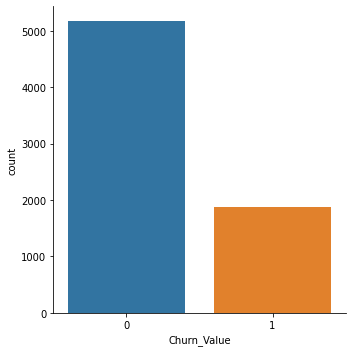

In [722]:
sns.catplot(x="Churn_Value", kind = "count", data =df_rev);

In [723]:
#Checking Gender Distribution 
df_rev['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [724]:
#Checking Churn Counts by Gender 
df_rev["Churn_Value"][df_rev["Churn_Value"]==1].groupby(by=df_rev["Gender"]).count()

Gender
Female    939
Male      930
Name: Churn_Value, dtype: int64

In [725]:

fig = px.histogram(df_rev, x="Churn_Value", color="Payment_Method", pattern_shape="Contract", title="<b>Customer Payment Method distribution Churn</b>")
fig.update_layout(width=600, height=500, bargap=0.1)
fig.show()

In [726]:
fig2 = px.histogram(df_rev, x="Churn_Value", color="Internet_Service", pattern_shape ="Phone_Service", title="<b>Customer Churn Distribution by Internet Service</b>")
fig2.update_layout(width=600, height=600, bargap=0.1)
fig2.show()

In [727]:
box = px.box(df, x = "Tenure_Months", y = "Churn_Label", width=800, height=400) # Show the relationship between Tenure and Churn
box.show()

## Train Test Split

In [728]:
features = ['Gender','Senior_Citizen','Partner','Dependents','Tenure_Months','Phone_Service',
            'Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection',
            'Tech_Support','Streaming_TV','Streaming_Movies','Contract','Paperless_Billing','Payment_Method',
            'Monthly_Charges','Total_Charges']

X = pd.get_dummies(df_rev[features], drop_first=True)
y = df['Churn_Value']

In [729]:
X

,Tenure_Months,Monthly_Charges,Total_Charges,Gender_Male,Senior_Citizen_Yes,Partner_Yes,Dependents_Yes,Phone_Service_Yes,Multiple_Lines_No phone service,Multiple_Lines_Yes,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Paperless_Billing_Yes,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,70.70,151.65,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,8,99.65,820.50,0,0,0,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
3,28,104.80,3046.05,0,0,1,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,49,103.70,5036.30,1,0,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,0,0
7039,24,84.80,1990.50,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7040,72,103.20,7362.90,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7041,11,29.60,346.45,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [730]:
#oversampling because dataset is imbalanced

over = SMOTE(sampling_strategy=1) 
f1 = X.iloc[:, :31]
t1 = y 


In [731]:
f1, t1 = over.fit_resample(f1,t1)
Counter(t1) 

Counter({1: 5174, 0: 5174})

In [732]:
# splitting into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(f1, t1, test_size=0.33, random_state=42)

## Scaling

In [733]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit(X_train)


X_train_scale = scaled.fit_transform(X_train)
X_test_scale = scaled.transform(X_test)

**Using scaled data now**

## Using Models

In [734]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scale, y_train)

y_pred_train_lr = model_lr.predict(X_train_scale)
y_pred_lr = model_lr.predict(X_test_scale)

print('train score:',accuracy_score(y_train, y_pred_train_lr))
print('test score:',accuracy_score(y_test, y_pred_lr))

train score: 0.8422039521130824
test score: 0.8322108345534407


In [736]:
model_dt = DecisionTreeClassifier(max_depth=11, random_state=42)
model_dt.fit(X_train_scale, y_train)

y_pred_train_dt = model_dt.predict(X_train_scale)
y_pred_dt = model_dt.predict(X_test_scale)

print('train score:',accuracy_score(y_train, y_pred_train_dt))
print('test score:',accuracy_score(y_test, y_pred_dt))    

train score: 0.8977354680513486
test score: 0.8152269399707174


In [737]:
# This model may be overfitting the dataset
model_rf2 = RandomForestClassifier(n_estimators = 3, random_state=42)
model_rf2.fit(X_train_scale, y_train)

y_pred_train_rf2 = model_rf2.predict(X_train_scale)
y_pred_rf2 = model_rf2.predict(X_test_scale)

print('train score:',accuracy_score(y_train, y_pred_train_rf2))
print('test score:',accuracy_score(y_test, y_pred_rf2))

train score: 0.9648060002884754
test score: 0.8014641288433382


In [738]:
model_rf1 = RandomForestClassifier(max_depth= 7, random_state=42)
model_rf1.fit(X_train_scale, y_train)

y_pred_train_rf1 = model_rf1.predict(X_train_scale)
y_pred_rf1 = model_rf1.predict(X_test_scale)

print('train score:',accuracy_score(y_train, y_pred_train_rf1))
print('test score:',accuracy_score(y_test, y_pred_rf1))

train score: 0.845954132410212
test score: 0.8248901903367496


In [739]:
model_xgb1 = XGBClassifier(n_estimators=3, random_state=42)
model_xgb1.fit(X_train_scale, y_train)

y_pred_train_xgb1 = model_xgb1.predict(X_train_scale)
y_pred_xgb1 = model_xgb1.predict(X_test_scale)

print('train score:',accuracy_score(y_train, y_pred_train_xgb1))
print('test score:',accuracy_score(y_test, y_pred_xgb1))

[18:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train score: 0.83412664070388
test score: 0.8140556368960469


In [740]:
model_xgb2 = XGBClassifier(n_estimators=10,max_depth=5,  random_state=42)
model_xgb2.fit(X_train_scale, y_train)

y_pred_train_xgb2 = model_xgb2.predict(X_train_scale)
y_pred_xgb2 = model_xgb2.predict(X_test_scale)

print('train score:',accuracy_score(y_train, y_pred_train_xgb2))
print('test score:',accuracy_score(y_test, y_pred_xgb2))

[18:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train score: 0.8517236405596423
test score: 0.8260614934114202


In [741]:
model_svc = SVC(random_state=42)
model_svc.fit(X_train_scale, y_train)

y_pred_train_svc = model_svc.predict(X_train_scale)
y_pred_svc = model_svc.predict(X_test_scale)

print('train score:',accuracy_score(y_train, y_pred_train_svc))
print('test score:',accuracy_score(y_test, y_pred_svc))

train score: 0.8599451896725804
test score: 0.8368960468521229


In [742]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(5,2), max_iter =500, activation='relu', solver='lbfgs', random_state=42)
model.fit(X_train_scale, y_train)

y_pred_train = model.predict(X_train_scale)
y_pred = model.predict(X_test_scale)

print('train score:',accuracy_score(y_train, y_pred_train))
print('test score:', accuracy_score(y_test, y_pred))

%timeit

train score: 0.8551853454493005
test score: 0.8336749633967789


## Examining Feature Importance 

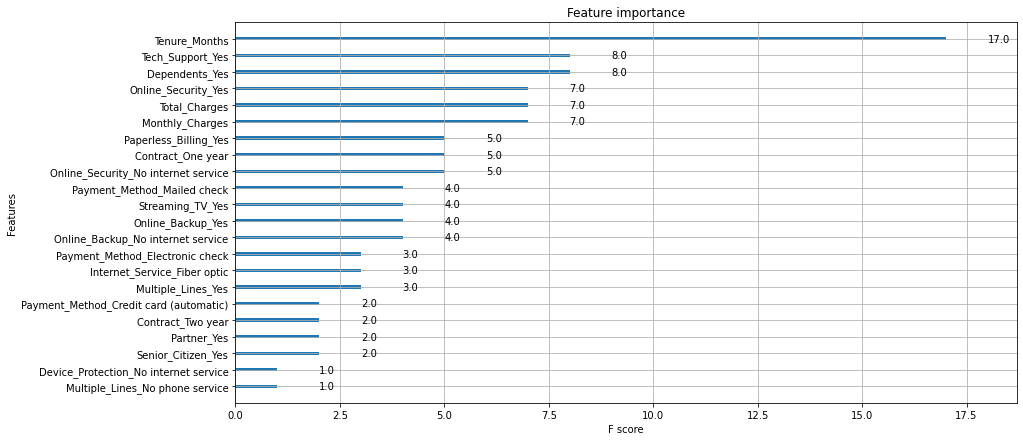

In [743]:
#Checking Feature Importance using XGB 

import xgboost as xgb

data_dmatrix = xgb.DMatrix(data =X, label=y)

params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
import matplotlib

data_dmatrix = xgb.DMatrix(data =X, label=y)
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10) 
matplotlib.pyplot.rcParams["figure.figsize"] = (14,7)
xgb.plot_importance(xg_reg) 
fig = matplotlib.pyplot.gcf() 


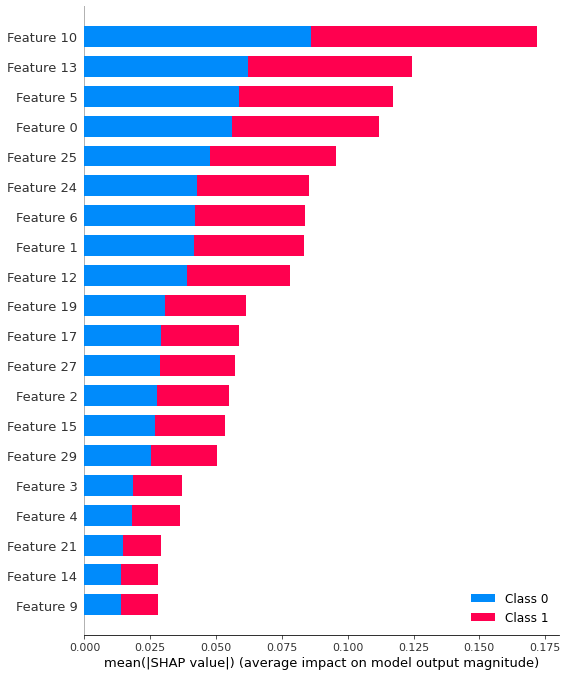

In [744]:
#Checking feature importance using Shapley Values 

explainer= shap.TreeExplainer(model_rf2)
shap_values = explainer.shap_values(X_test_scale)
shap.summary_plot(shap_values, X_test_scale, plot_type="bar")

## Model Evaluations

In [745]:
from sklearn.model_selection import cross_val_score

In [746]:
score_for_lr = cross_val_score(LogisticRegression(random_state=42),X, y, cv=3)
print(score_for_lr)
print(np.average(score_for_lr))

[0.80621806 0.810477   0.80698764]
0.8078942344752699


In [747]:
score_for_dt = cross_val_score(DecisionTreeClassifier(max_depth=11, random_state=42),X, y, cv=3)
print(score_for_dt)
print(np.average(score_for_dt))

[0.75212947 0.75894378 0.75458032]
0.7552178563763907


In [748]:
score_for_rf = cross_val_score(RandomForestClassifier(max_depth= 7, random_state=42),X, y, cv=3)
print(score_for_rf)
print(np.average(score_for_rf))


[0.80238501 0.79684838 0.80911802]
0.8027838043757819


In [749]:

score_for_xgb = cross_val_score(XGBClassifier(n_estimators=10,max_depth=5,  random_state=42),X, y, cv=3)
print(score_for_xgb)
print(np.average(score_for_xgb))

[18:11:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.79897785 0.80195911 0.79804005]
0.7996590062537093


In [750]:
score_for_SVC = cross_val_score(SVC(random_state=42),X, y, cv=3)
print(score_for_SVC)
print(np.average(score_for_SVC))

[0.7346678  0.7346678  0.73455475]
0.7346301185052165


In [751]:
score_for_MLP = cross_val_score(MLPClassifier(hidden_layer_sizes=(5,2), max_iter =500, activation='relu', solver='adam', random_state=42),X, y, cv=3)
print(score_for_MLP) 
print(np.average(score_for_MLP))

[0.80621806 0.79770017 0.81082233]
0.8049135182178272


Top performing models before cross validaiton:
- MLP
- SVC
- LR
- RF and XGB very similar


After cross validation:
- LR
- MLP
- RF
- XGB

## Voting using top performing models

In [752]:
from sklearn.ensemble import VotingClassifier
clf1 = MLPClassifier(hidden_layer_sizes=(5,2), max_iter =500, activation='relu', solver='adam', random_state=42)
clf2 = LogisticRegression(random_state=42)
clf3 = XGBClassifier(n_estimators=10,max_depth=5,  random_state=42)
clf4 = RandomForestClassifier(max_depth= 7, random_state=42)
eclf1 = VotingClassifier(estimators=[('MLP', clf1), ('SVC', clf2), ('XGB', clf3), ('RF', clf4)], voting='soft')
eclf1.fit(X_train_scale, y_train)
predictions = eclf1.predict(X_test_scale)
print("Final Accuracy Score")
print(accuracy_score(y_test, predictions))

[18:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Final Accuracy Score
0.8386530014641288


In [753]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1700
           1       0.82      0.87      0.84      1715

    accuracy                           0.84      3415
   macro avg       0.84      0.84      0.84      3415
weighted avg       0.84      0.84      0.84      3415



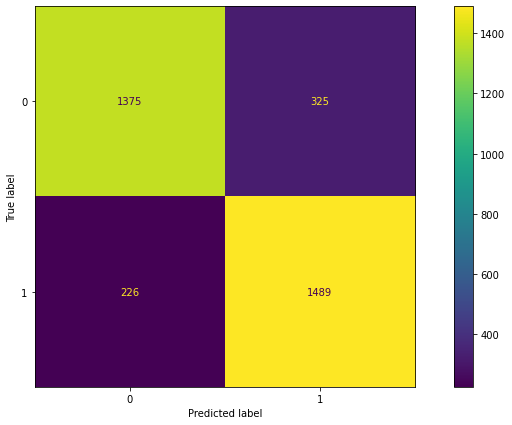

In [754]:
#Confusion Matrix using Voting Outputs 

from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(eclf1, X_test_scale, y_test)

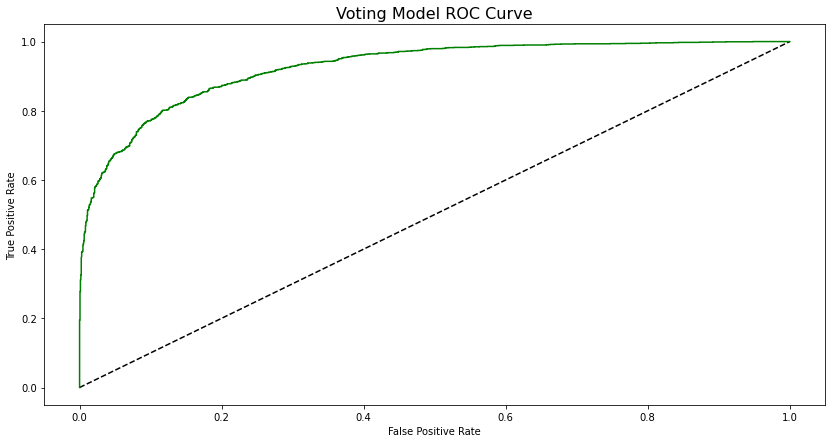

In [755]:
y_pred_prob = eclf1.predict_proba(X_test_scale)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Voting_Output',color = "g")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Voting Model ROC Curve',fontsize=16)
plt.show();